# 8.1.1 Análisis de Componentes Principales (PCA) 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/GrCSscrpAAI?si=nxIv1FcASrNjTNOI

Este método se usa para descomponer un dataset multivariado en un conjunto de componentes ortogonales que explican la máxima cantidad de la varianza. Para ello, considere el siguiente dataset donde claramente se observa una relación lineal entre las variables, y se grafican los ejes ortogonales:

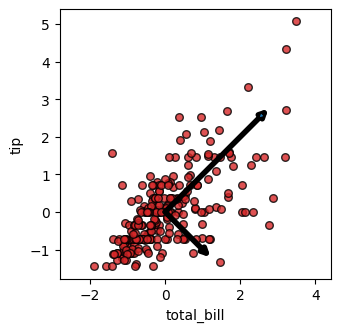

In [3]:
df = sns.load_dataset("tips")[["total_bill", "tip"]]
X = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
pca.fit(X)

plt.figure(figsize=(3.5, 3.5))
plt.scatter(X[:, 0], X[:, 1], color="tab:red", edgecolors="k", s=30, alpha=0.8)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax = plt.gca()
    ax.annotate(
        "",
        pca.mean_ + v,
        pca.mean_,
        arrowprops=dict(arrowstyle="-|>", linewidth=4, shrinkA=0, shrinkB=0),
    )

plt.xlabel("total_bill")
plt.ylabel("tip")
plt.axis("equal")
plt.show()

En el gráfico anterior, las componentes definen la dirección los vectores, mientras que la varianza explicada corresponde al cuadrado de la longitud de los vectores. Estos definen las principales componentes de los datos.

Este es un método para la reducción lineal de la dimensionalidad de los datos (ya que estos son proyectados en un espacio dimensional menor), que también puede ser usado para visualización.

En scikit-learn, PCA es implementado como un transfomer que aprende $n$ componentes del conjunto de datos para entrenamiento, y luego es usado para proyectar nuevos datos en estos componentes.

PCA centra pero no escala los datos de entrada antes de aplicar la SVD.

El parámetro whiten=True hace posible escalar los datos en el espacio singular mientras que escala cada componente para que tenga varianza unitaria. Esto es usualmente util para los modelos que usan los datos transformados, tal como las SVM y K-Means.

El objeto PCA también incorpora una interpretación probabilistica que permite computar la verosimilitud a partir de la varianza explicada. De esta forma, el método score puede ser usado en validación cruzada.

In [4]:
digits = load_digits(n_class=6)

X = digits.data
y = digits.target

In [5]:
pca = PCA(
    # --------------------------------------------------------------------------
    # Number of components to keep.
    # * None: all components are kept with
    #   n_components == min(n_samples, n_features)
    # * integer
    # * float: percentage of the variance explained
    n_components=2,
    # --------------------------------------------------------------------------
    # When True, components_ are uncorrelated with unit variance
    whiten=False,
    # --------------------------------------------------------------------------
    # Used solver:
    # * 'auto'
    # * 'full'
    # * 'arpack'
    # * 'randomized'
    svd_solver="auto",
    # --------------------------------------------------------------------------
    # Tolerance for singular values computed by svd_solver == ‘arpack’. Must be
    # of range [0.0, infinity).
    tol=0.0,
    # --------------------------------------------------------------------------
    # Number of iterations for the power method computed by
    # svd_solver == ‘randomized’. Must be of range [0, infinity).
    iterated_power="auto",
    # --------------------------------------------------------------------------
    # This parameter is only relevant when svd_solver="randomized". It
    # corresponds to the additional number of random vectors to sample the
    # range of X so as to ensure proper conditioning.
    n_oversamples=10,
    # --------------------------------------------------------------------------
    # Power iteration normalizer for randomized SVD solver. Not used by ARPACK.
    # * 'none'
    # * 'auto'
    # * 'QR'
    # * 'LU'
    power_iteration_normalizer="auto",
    # --------------------------------------------------------------------------
    # Used when the ‘arpack’ or ‘randomized’ solvers are used.
    random_state=None,
)

X_proj = pca.fit_transform(X)

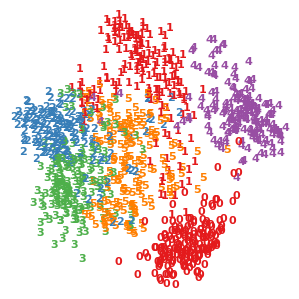

In [6]:
plt.figure(figsize=(3.5, 3.5))

for i in range(X_proj.shape[0]):
    plt.text(
        X_proj[i, 0],
        X_proj[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 8},
    )

plt.xlim((X_proj[:, 0].min(), X_proj[:, 0].max()))
plt.ylim((X_proj[:, 1].min(), X_proj[:, 1].max()))

plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xticks([])
plt.yticks([])

plt.show()

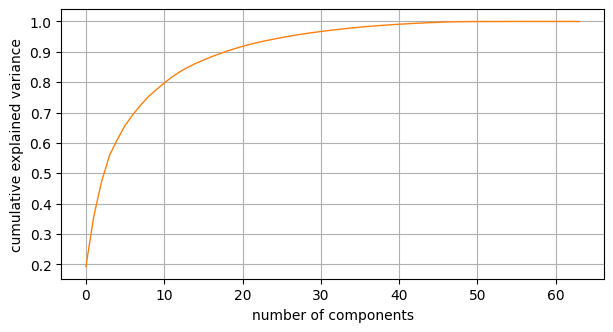

In [7]:
pca = PCA().fit(digits.data)

plt.figure(figsize=(7, 3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="tab:orange", linewidth=1)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.grid()
plt.show()

#### Notes

In [8]:
# Scale the data
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(Xs)

PCA()

In [9]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[1.53727152e-01 1.02513281e-01 8.00921542e-02 7.01023877e-02
 4.84395272e-02 4.46208561e-02 3.67650074e-02 3.33804929e-02
 2.95724197e-02 2.78747540e-02 2.50776384e-02 2.28081456e-02
 2.21919220e-02 1.90914570e-02 1.85353035e-02 1.75459269e-02
 1.62310864e-02 1.52079778e-02 1.42147193e-02 1.34865424e-02
 1.24013165e-02 1.19158553e-02 1.10130059e-02 1.05056728e-02
 9.70932881e-03 9.38693558e-03 8.46804048e-03 8.02186132e-03
 7.62627940e-03 7.29335766e-03 6.65455141e-03 6.24125259e-03
 5.74739145e-03 5.61076155e-03 5.01230061e-03 4.74732257e-03
 4.62469622e-03 4.19351495e-03 4.01305765e-03 3.68169797e-03
 3.21434768e-03 3.16120843e-03 3.01076844e-03 2.93762043e-03
 2.65672637e-03 2.59104718e-03 2.47764515e-03 2.38415830e-03
 2.28125544e-03 2.08231286e-03 1.91902724e-03 1.84324344e-03
 1.74325383e-03 1.56043297e-03 1.45106219e-03 1.33964400e-03
 1.26880987e-03 1.18818941e-03 9.85739868e-04 8.25734936e-04
 7.30820133e-04 3.16671786e-33 8.56094056e-34 8.35128659e-34]


In [10]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.15372715 0.25624043 0.33633259 0.40643497 0.4548745  0.49949536
 0.53626037 0.56964086 0.59921328 0.62708803 0.65216567 0.67497382
 0.69716574 0.71625719 0.7347925  0.75233843 0.76856951 0.78377749
 0.79799221 0.81147875 0.82388007 0.83579592 0.84680893 0.8573146
 0.86702393 0.87641087 0.88487891 0.89290077 0.90052705 0.9078204
 0.91447496 0.92071621 0.9264636  0.93207436 0.93708666 0.94183399
 0.94645868 0.9506522  0.95466525 0.95834695 0.9615613  0.96472251
 0.96773328 0.9706709  0.97332762 0.97591867 0.97839632 0.98078047
 0.98306173 0.98514404 0.98706307 0.98890631 0.99064957 0.99221
 0.99366106 0.99500071 0.99626952 0.99745771 0.99844344 0.99926918
 1.         1.         1.         1.        ]


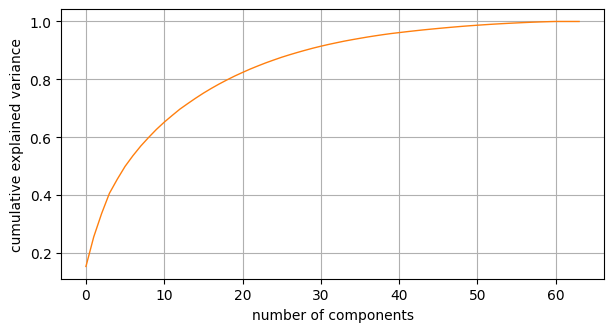

In [11]:
plt.figure(figsize=(7, 3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="tab:orange", linewidth=1)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.grid()
plt.show()

In [12]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components = 6))])

# Fit the pipeline to poke_df and transform the data
pc =  pipe.fit_transform(Xs)
print(pc)

[[ 2.69540554  4.13551046  1.06981341 -0.61313273  0.02699354  0.69391479]
 [ 0.03399476 -4.50649757 -1.36924155  0.30993377 -0.66102404 -0.99393713]
 [ 0.75985039 -2.65661046 -2.21924287 -1.80080092 -2.03203581  0.72614168]
 ...
 [ 6.14960838 -1.24713471 -1.31894983 -1.04861198 -1.4905574   0.14878396]
 [ 6.21778842 -2.07670661  0.05600853 -0.9186567  -0.66030816 -0.35080315]
 [ 3.13908166  3.45698666  1.33952668 -1.15909203 -0.52461625  0.02663486]]


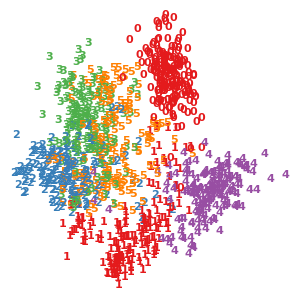

In [13]:
plt.figure(figsize=(3.5, 3.5))

for i in range(pc.shape[0]):
    plt.text(
        pc[i, 0],
        pc[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 8},
    )

plt.xlim((pc[:, 0].min(), pc[:, 0].max()))
plt.ylim((pc[:, 1].min(), pc[:, 1].max()))

plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xticks([])
plt.yticks([])

plt.show()

In [14]:
print('ok_')

ok_
